# OpenCV – Open Source Computer Vision.
It is one of the most widely used tools for computer vision and image processing tasks.
* face detection
* video capturing
* tracking moving objects
* object disclosure
* face mask detection
* social distancing

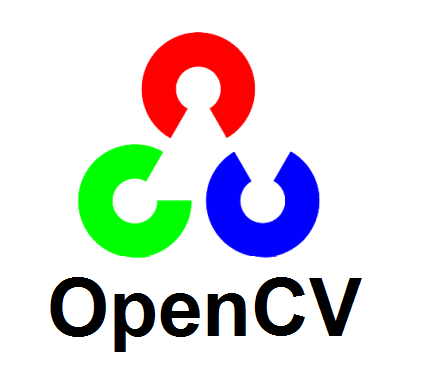

## Installation

In [1]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 46.1/67.0 MB 117.5 kB/s eta 0:02:58
error: incomplete-download

× Download failed because not enough bytes were received (46.1 MB/67.0 MB)
╰─> URL: https://files.pythonhosted.org/packages/68/1f/795e7f4aa2eacc59afa4fb61a2e35e510d06414dd5a802b51a012d691b37/opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl

note: This is an issue with network connectivity, not pip.
hint: Consider using --resume-retries to enable download resumption.
Note: you may need to restart the kernel to use updated packages.


## Image Types



*   RGB images
*   Gray style images
*   Binary images
*   Multispectral images





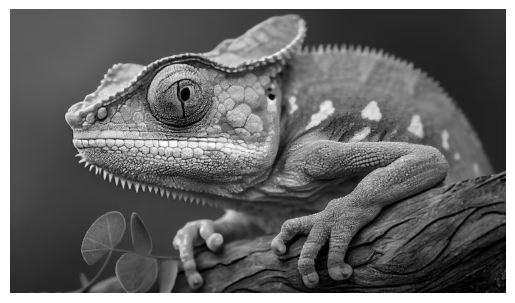

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("img1.jpg", 0)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
img = cv2.imread("img1.jpg", 0)
print(img.shape)

(423, 740)


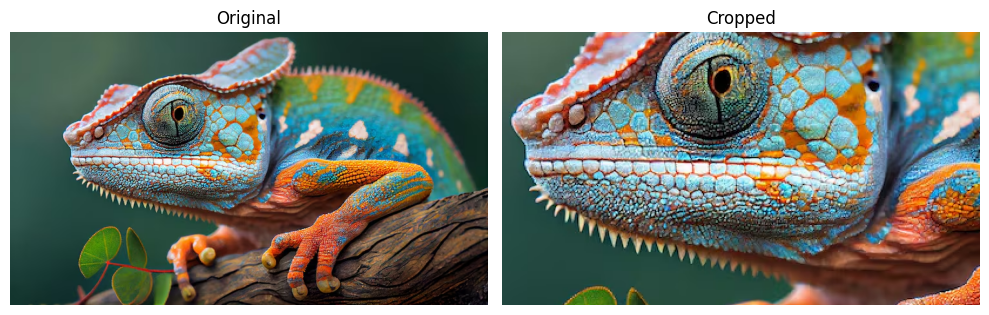

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('img1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))  # or (20, 20) if you prefer large figures

# Original image
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(img)
plt.axis('off')

# Image dimensions
hgt, wdt = img.shape[:2]

# Define crop region: 25% to 75% in both dimensions
start_row, start_col = int(hgt * 0.20), int(wdt * 0.10)
end_row, end_col = int(hgt * 0.75), int(wdt * 0.65)

cropped = img[start_row:end_row, start_col:end_col]

# Cropped image
plt.subplot(2, 2, 2)
plt.title("Cropped")
plt.imshow(cropped)
plt.axis('off')

plt.tight_layout()
plt.show()

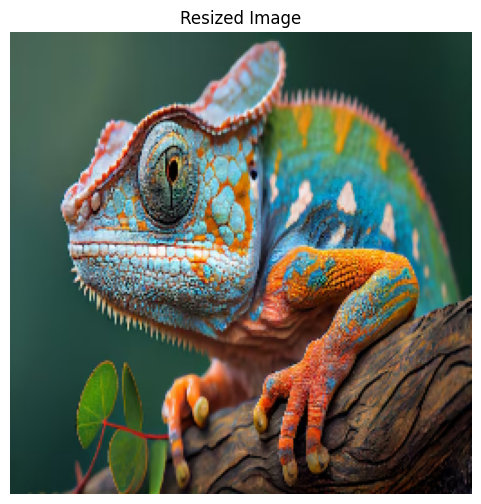

In [ ]:
# new size
new_width, new_height = 256, 256

# resize image
resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

#output
plt.figure(figsize=(6, 6))
plt.imshow(resized)
plt.axis('off')
plt.title('Resized Image')
plt.show()

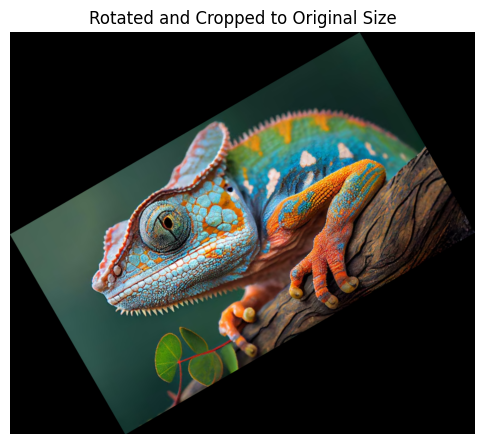

In [ ]:
import numpy as np

(h, w) = img.shape[:2]
center = (w // 2, h // 2)
angle = 30

# Make rotation matrix
M = cv2.getRotationMatrix2D(center, angle, 1.0)

# Compute size of the rotated image and perform the rotation
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

M[0, 2] += (nW / 2) - center[0]
M[1, 2] += (nH / 2) - center[1]

rotated = cv2.warpAffine(img, M, (nW, nH))

plt.figure(figsize=(6, 6))
plt.imshow(rotated)
plt.axis('off')
plt.title('Rotated and Cropped to Original Size')
plt.show()

## Thresholding

Thresholding is an image segmentation method. It compares pixel values with a threshold value and updates it accordingly. OpenCV supports multiple variations of thresholding. A simple thresholding function can be defined like this:

if Image(x,y) > threshold , Image(x,y) = 1

otherswise, Image(x,y) = 0

### Simple Thresholding

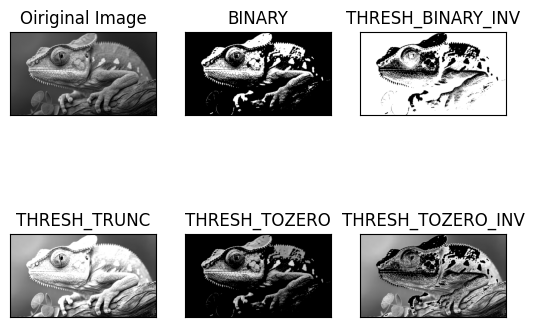

In [ ]:
#importing the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt


#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread('img1.jpg',0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Adaptive Thresholding

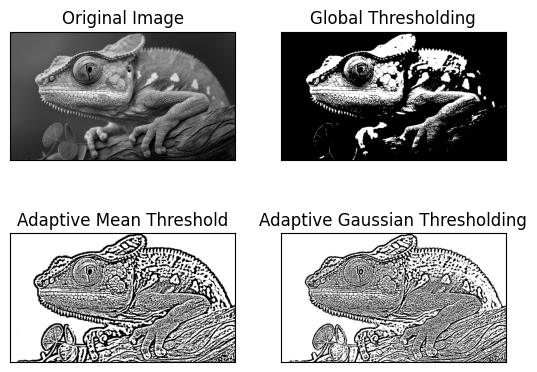

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#ADAPTIVE THRESHOLDING
gray_image = cv2.imread('img1.jpg',0)

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Edge Detection
Edges are the points in an image where the image brightness changes sharply or has discontinuities. Such discontinuities generally correspond to:

* Discontinuities in depth
* Discontinuities in surface orientation
* Changes in material properties
* Variations in scene illumination

Edges are very useful features of an image that can be used for different applications like classification of objects in the image and localization. Even deep learning models calculate edge features to extract information about the objects present in image.

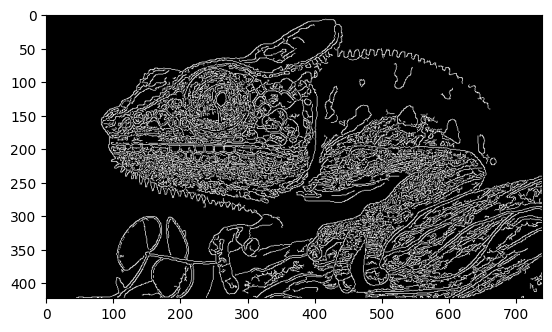

In [ ]:
#import the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
#read the image
image = cv2.imread('img1.jpg')
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,10,300)

img_output = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
#plot the edges
plt.imshow(img_output)

## To Do:
Based on what you learned from the OpenCV library, implement code that only captures the edge of the chameleon as much as you can.

In [ ]:
## To Do

## Image Filtering

In image filtering, a pixel value is updated using its neighbouring values. But how are these values updated in the first place?

Well, there are multiple ways of updating pixel values, such as selecting the maximum value from neighbours, using the average of neighbours, etc. Each method has it’s own uses. For example, averaging the pixel values in a neighbourhood is used for image blurring.

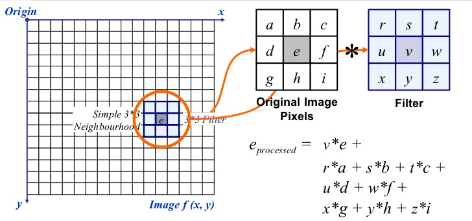

Gaussian filtering is also used for image blurring that gives different weights to the neighbouring pixels based on their distance from the pixel under consideration.

For image filtering, we use kernels. Kernels are matrices of numbers of different shapes like 3 x 3, 5 x 5, etc. A kernel is used to calculate the dot product with a part of the image. When calculating the new value of a pixel, the kernel center is overlapped with the pixel. The neighbouring pixel values are multiplied with the corresponding values in the kernel. The calculated value is assigned to the pixel coinciding with the center of the kernel.

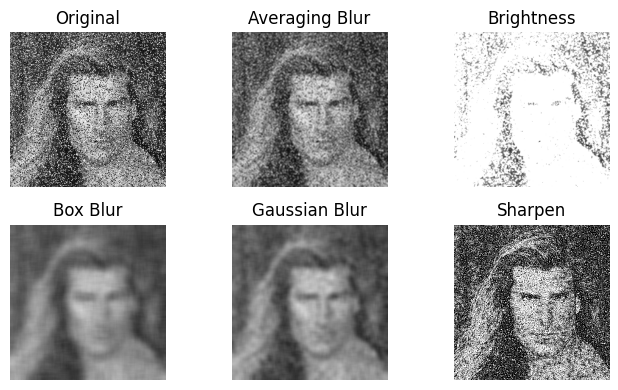

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("sp_img_gray_noise_heavy.png")

original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. AVERAGING BLUR
averaging_kernel = np.ones((3, 3), np.float32) / 9
averaging_img = cv2.filter2D(img, -1, averaging_kernel)
averaging_rgb = cv2.cvtColor(averaging_img, cv2.COLOR_BGR2RGB)

# 2. BRIGHTNESS
brightness_kernel = np.ones((3, 3), np.float32) * 0.3
brightness_kernel[1, 1] = 1.1
bright_img = cv2.filter2D(img, -1, brightness_kernel)
bright_rgb = cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB)

# 3. BOX BLUR
box_blur_img = cv2.blur(img, (15, 15))
box_blur_rgb = cv2.cvtColor(box_blur_img, cv2.COLOR_BGR2RGB)

# 4. GAUSSIAN BLUR
gauss_img = cv2.GaussianBlur(img, (11, 11), 5)
gauss_rgb = cv2.cvtColor(gauss_img, cv2.COLOR_BGR2RGB)

# 5. SHARPEN
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]], np.float32)
sharp_img = cv2.filter2D(img, -1, sharpen_kernel)
sharp_rgb = cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7, 4))

filters = [
    (original_rgb, 'Original'),
    (averaging_rgb, 'Averaging Blur'),
    (bright_rgb, 'Brightness'),
    (box_blur_rgb, 'Box Blur'),
    (gauss_rgb, 'Gaussian Blur'),
    (sharp_rgb, 'Sharpen')
]

for i, (img_rgb, title) in enumerate(filters):
    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(title, fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

## To Do:

In this exercise, you will write a simple Python code using OpenCV to apply different image processing filters on a noisy grayscale image. This will help you understand the differences and applications of each filter. By tweaking parameters, you'll see their effects and learn when to use each filter.

**Basic Concepts**

Filters in image processing are like magic brushes that modify pixels based on a small matrix called a kernel. Filters can:

* Reduce noise (like random speckles).
* Sharpen edges.
* Adjust brightness or contrast.

**Filters to Implement:**

1. Averaging Blur: Averages neighboring pixels (reduces noise, softens image).
2. Box Blur: Similar to Averaging, but with a larger kernel.
3. Gaussian Blur: Reduces noise naturally, preserves edges better.
4. Sharpen: Enhances edges (but may amplify noise).
5. Brightness: Increases image brightness/contrast.

**Input Image:**

 A grayscale image with heavy noise (e.g., salt-and-pepper noise) named `noisy_image.jpg`.


**Implementation Instructions**


1. Setup Environment:

    * Import OpenCV `(cv2)`, NumPy `(np)`, and Matplotlib `(plt)`.
    * Load the grayscale image using `cv2.imread('noisy_image.png', cv2.IMREAD_GRAYSCALE)`.
    * Check if the image loaded correctly; if not, print an error and exit.


2. Create Filters:

    * Averaging Blur:

      * Create a 3x3 kernel with all values 1/9.
      * Apply with `cv2.filter2D(image, -1, kernel)`.


    * Box Blur:

      * Use `cv2.blur(image, (15, 15))`.


    * Gaussian Blur:

      * Use `cv2.GaussianBlur(image, (11, 11), sigmaX=5)`.


    * Sharpen:

      * Create a 3x3 kernel: edges -1, center 9.
       Apply with `cv2.filter2D`.


    * Brightness:

      * Create a 3x3 kernel: all 0.3, center 1.1.
        Apply with `cv2.filter2D`.




3. Display Results:

   * Create a figure.
   * Show 6 images (original + 5 filters) in one.
   * Turn off axes.
   * Add titles.


4. Interactive Exercise:

   Change parameters for each filter:

   * Averaging: Try kernel sizes 5x5 or 7x7.
   * Box Blur: Try ksize (5,5) or (25,25).
   * Gaussian: Try sigmaX/sigmaY = 1 or 10.
   * Sharpen: Change center of kernel to 5 or 13.
   * Brightness: Adjust kernel weights (e.g., all 0.2, center 1.5).


   Observe changes in the output.


5. Analysis Questions:

    * Answer these to understand the filters:
    * Which filter removed noise best? Why?
    * What did Sharpen do? When should we avoid it?
    * What’s the difference between Gaussian and Box Blur? Which preserved edges better?
    * How did Brightness change the image? Where is it useful?
    * What happened when you increased the kernel size?

In [ ]:
#To Do

## Cornel Detection

In [ ]:
gray_img = cv2.imread("img1.jpg",0)

### SHI-TOMASI METHOD

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50,
                qualityLevel=0.3, minDistance=50)
corners = corners.astype(np.int32)

for c in corners:
    x, y = c.ravel()
    img = cv2.circle(gray_img, center=(x, y), radius=20,
                    color=(0, 0, 255), thickness=-1)

img_output = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_output)
plt.axis('off')
plt.show()


### HARRIS CORNER DETECTION

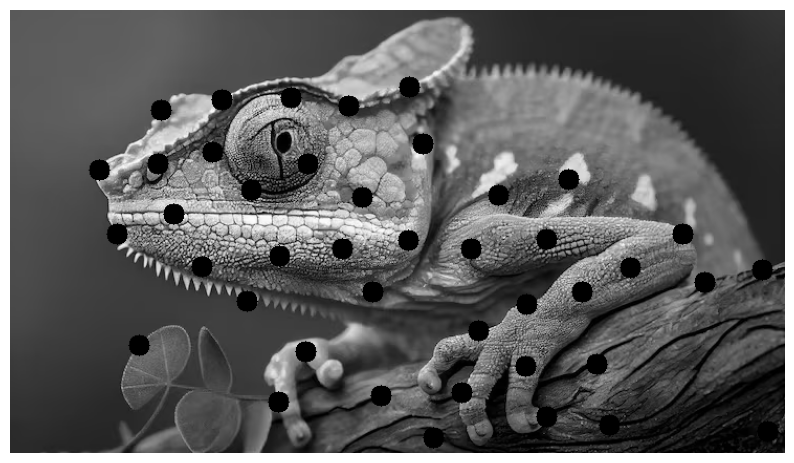

In [ ]:
gray_img = cv2.imread("shapes.png",0)

corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50,
                qualityLevel=0.01, minDistance=50,
                useHarrisDetector=True, k=0.1)
corners = corners.astype(np.int32)

for c in corners:
    x, y = c.ravel()
    img = cv2.circle(gray_img, center=(x, y), radius=10,
                    color=(0, 254, 0), thickness=-1)

img_output = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_output)
plt.axis('off')
plt.show()

## (To Do) Self-Learning Exercise: Understanding Basic Feature Extraction (HOG) for Students

Objective: In this self-guided exercise, you’ll learn about basic feature extraction using the Histogram of Oriented Gradients (HOG) method without prior instruction. HOG is a popular technique to detect and describe the structure of objects in images by analyzing the distribution of gradient orientations. Through this hands-on activity, you’ll implement HOG, apply it to a noisy colorful image, and observe its effects. This will help you understand how features are extracted and why they’re useful in tasks like object recognition.

> **Note:** please do more research on HOG method.


**Now step by step implement the code**

Setup Environment:
* **Load and Prepare the Image**

    * Use the noisy colorful image provided (e.g., `noisy_color_image.png` generated earlier).

    * Convert it to grayscale since HOG works best with grayscale
* **Apply HOG:**

    * Use the `skimage.feature.hog `function to extract HOG features. Start with default settings

    * `hog_features` is the feature vector, and `hog_image` is a visual representation.
    
* **Enhance and Display**
    * Normalize the HOG image for better visualization

    * Display the original image and HOG visualization side by side

* **Experiment and Analyze:**

    **Change Parameters**: Try different values for:

    * `orientations` (e.g., 6 or 12) to see how many gradient directions affect the result.
    * `pixels_per_cell` (e.g., (4, 4) or (16, 16)) to adjust cell size.
    * `cells_per_block` (e.g., (1, 1) or (3, 3)) to change block size.

  **Apply Filters First:**
  Before HOG, apply one of the filters you learned (e.g., Gaussian Blur with (5, 5) or Sharpen). Compare the HOG output
* **Self-Reflection Questions:**
  1. What changes do you see in the HOG visualization when you adjust `orientations` or `pixels_per_cell`?
  2. How does applying a filter (like Gaussian Blur) before HOG affect the result? Why?
  3. Why might HOG be useful for object detection in noisy images?
  4. What happens if the image is too noisy or the cell size is too large?

In [ ]:
# To Do